# Euler Circuits

Euler circuits are a special type of circuit where every edge in the graph is used exactly once. Graphs that have euler circuits must have the following properties:

1. The graph must be connected.
1. If the graph is *undirected* then every vertex must have an even-degree.
1. If the graph is *directed* then the in-degree must be the same as the out-degree for every vertex.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import imageio
import os
from IPython.display import Image
from helper import draw_graph, clear_marks

## How the algorithm works

pseudocode:
```
function euler_circuit(G):
    init an empty list to store our path --> paths_list
    choose a random start node
    choose a random unvisited path till we reach our start node.
    add the path to our list (it will look [a, b, ..., x, ...,a])
    for any node, x, in the path that has unvisted edges connected to it:
        choose a random unvisited path till we reach x again ([x, c, ..., g, x])
        add this path in where x was in the original path ([a, b, ..., x, c, ..., g, x, ..., a])
        repeat until every edge is marked.
```

The algorithm tries finds cycles in the graph and creates a path from it. Then it just keeps finding new cycles and adds these paths in with the original cycle and builds up the euler-circuit.

For example: If we find a cycle in he graph starting and ending at node a then that first cycle becomes our path (a, ..., x, ..., a). We then find another __unvisited__ cycle starting and ending at x (x, ..., b, ..., x). We just replace x in our original path with with our new path to get (a, ..., x, ..., b, ..., x, ..., a)

In [2]:
def find_cycle(G, start_node):
    cycle = [start_node]
    prev = start_node
    while True:
        rand_neighbor = random.choice([n for n in G.adj[prev] if not G.adj[prev][n].get('marked')])
        if not G.edges[(prev, rand_neighbor)].get('marked'):
            G.edges[prev, rand_neighbor]['marked'] = True
            cycle.append(rand_neighbor)
            prev = rand_neighbor
        if prev == start_node:
            break
    return cycle

def euler_circuit(G):
    G = G.copy()
    start = random.choice(list(G.nodes))
    circuit = find_cycle(G, start)
    start_search = 0
    while True:
        for i, node in enumerate(circuit[start_search:]):
            if len(list(n for n in G.adj[node] if not G.adj[node][n].get('marked'))) > 0:
                cycle = find_cycle(G, node)
                start_search += i
                circuit = circuit[:start_search] + cycle + circuit[start_search+1:]
                break
        else:
              return circuit

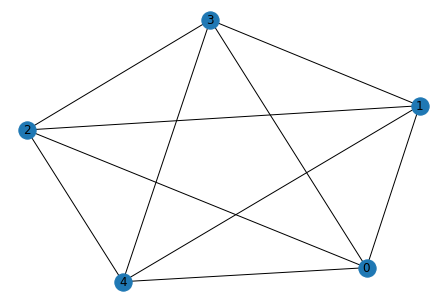

In [3]:
# In an undirected complete graph with N vertices.
# the degree of each vertex is N - 1.
G = nx.complete_graph(5)
nx.draw(G, with_labels=1)

In [4]:
euler_circuit(G)

[0, 4, 1, 3, 2, 0, 3, 4, 2, 1, 0]

In [5]:
def animate_euler(G, circ=None):
    if not circ:
        circ = euler_circuit(G)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()

    nx.draw_networkx_nodes(G, pos,
                           nodelist=G.nodes,
                           node_color='#00bbff',
                           ax=ax)
    
    nx.draw_networkx_edges(G, pos,
                           edgelist=G.edges,
                           ax=ax)
    labels = {n: n for n in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=14, ax=ax)
    ax.axis('off')
    plt.savefig('.tmp0.png')
    tmp_files = ['.tmp0.png']
    marked_edges = []
    for i, edge in enumerate(zip(circ, circ[1:]), 1):
        marked_edges.append(edge)
        unmarked_edges = list(set(G.edges) - set(marked_edges) - set(e[::-1] for e in marked_edges))
        ax.clear()
        nx.draw_networkx_nodes(G, pos,
                               nodelist=G.nodes,
                               node_color='#00bbff',
                               ax=ax)
        nx.draw_networkx_edges(G, pos,
                               edgelist=marked_edges,
                               edge_color ='#b300ff',
                               ax=ax)
        nx.draw_networkx_edges(G, pos,
                               edgelist=unmarked_edges,
                               ax=ax)
        nx.draw_networkx_labels(G, pos, labels, font_size=14, ax=ax)
        ax.axis('off')
        tmp_files.append(f'.tmp{i}.png')
        plt.savefig(tmp_files[-1])
    ax.remove()
    with imageio.get_writer('euler.gif', mode='I') as writer:
        for file in tmp_files:
            image = imageio.imread(file)
            for _ in range(5):
                writer.append_data(image)
            os.remove(file)
        
    return Image(url='euler.gif') 

animate_euler(G)

<Figure size 432x288 with 0 Axes>

![](euler.gif)